# Problem Statement

The details related to credit and the basic bank details of customers is collected over a long duration of time. This model can be used to reduce manual effort and predict the credit score brackets of people using classification algorithms. In this work, we shall see the usage of:
1.   Logistic Regression
2.   Random Forest Classifier
3.   K Neighbors Classifier
4.   Decision Tree Classifier

Dataset Link: https://docs.google.com/spreadsheets/d/1MndZhnene8G_LkUmpR1b4S6GYysYZhhDr7ViYl4Uctg/edit?usp=share_link

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score as score
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_auc_score, cohen_kappa_score, classification_report
from google.colab import drive
import warnings

In [ ]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

# Reading Data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas as pd
data = pd.read_csv('/content/dataset - data.csv') 
# data = pd.read_csv("dataset.csv")

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


# Examining the Data

In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

### Examining the Statistical Values of the Features Present

In [ ]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


### Examining the Count, Unique, Topmost Values and Frequency

In [ ]:
display(data.describe(exclude=np.number).T)

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10136,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


### Examining the Dependent Variable
Here we plot a bar chart that helps us visualize the frequencies of values in the variable to be predicted.

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

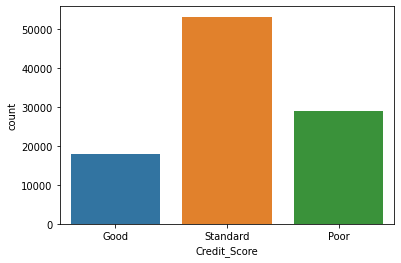

In [ ]:
display(data['Credit_Score'].value_counts())
sns.countplot(data['Credit_Score'])

# Cleaning and Preprocessing the Data

This is the most elaborate part of this work. We handle inconsistencies in the data and use methods to preprocess the data in order to get better results. 

### Getting rid of Inconsistent Values in the Entire Data

In [ ]:
data = data.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

### Managing datatypes of each numeric feature

In [ ]:
data['Age'] = data['Age'].astype(int)
data['Annual_Income'] = data['Annual_Income'].astype(float)
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(float)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(float)
data['Monthly_Balance'] = data['Monthly_Balance'].astype(float)

### Handling other features
The ID and Customer_ID features are being converted from a hexadecimal form to integer decimal form.

The Month is being converted to a numeric format.
Eg. January -> 1, February -> 2...

Inconsistencies in the SSN feature are being handled.

In [ ]:
data['ID'] = data.ID.apply(lambda x: int(x, 16))
data['Customer_ID'] = data.Customer_ID.apply(lambda x: int(x[4:], 16))
data['Month'] = pd.to_datetime(data.Month, format='%B').dt.month
data['SSN'] = data.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

### Handling Disparities in the Credit_History_Age Feature

The original form of the data presents the Credit_History_Age in the form of "X years and Y months". Here we convert the same to the number of months to ensure consistent behaviour. 

In [ ]:
def convert_month(m):
    if pd.notnull(m):
        m1 = int(m.split(' ')[0])
        m2 = int(m.split(' ')[3])
        return (m1 * 12) + m2
    else:
        return m

data['Credit_History_Age'] = data.Credit_History_Age.apply(lambda x: convert_month(x)).astype(float)

### Handling Type_of_Loan

Here we are extracting the Type of Loan from a comma separated format and storing it in a dictionary. This way all distinct values of loan type are saved as key value pairs in a dictionary.

In [ ]:
def convert_loan_vals(df_column, diff_value = []):   
    col = df_column.dropna()
    for i in col:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

convert_loan_vals(data['Type_of_Loan'])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

### Reassigning Group NaN Values


In [ ]:
def Reassign_Object_NaN(df, groupby, column, inplace=True):      
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # inplace
        if inplace:
            df[column] = result
        else:
            return result
    
    # Run      
    if inplace:  
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        a = df.groupby(groupby)[column].apply(list) 
        
        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        b = df.groupby(groupby)[column].apply(list)
    else:   
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

Here we perform a group by operation on the Customer ID for the Name feature. Observe that certain names are "nan" in this.

In [ ]:
data.groupby('Customer_ID')['Name'].apply(list).head().values

array([list(['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan]),
       list([nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu']),
       list(['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan]),
       list(['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']),
       list(['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan])],
      dtype=object)

We use the newly defined method to reassign the names marked "nan" to the same name as the group it belongs to. In the next cell, we are performing this operation on data of object type.

In [ ]:
Reassign_Object_NaN(data, 'Customer_ID', 'Name')
Reassign_Object_NaN(data, 'Customer_ID', 'Occupation')
data['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)
Reassign_Object_NaN(data, 'Customer_ID', 'Credit_Mix')
Reassign_Object_NaN(data, 'Customer_ID', 'Payment_Behaviour')

### Detecting Group Min-Max in Numeric Columns and Reassigning NaN Values

Similar to the method defined in the previous section, this one operates on numerical data. Here we detect the presence of NaN values in the each feature by using a line of code of the form:


```
data.feature_name.value_counts(dropna=False)
```

For the sake of brevity, we have not included those checks here. If a feature contains NaN values, the function is called and the range of wrong values is identified using min and max. Next these values are reassigned using the local mode of the feature. 

In [ ]:
# Reassign Wrong Values and Show Function
def Reassign_Numeric_Nan(df, groupby, column, inplace=True):      
    # import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:   
        mini, maxi = get_group_min_max(df, groupby, column)        
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)        
        a = df.groupby(groupby)[column].apply(list) 
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        b = df.groupby(groupby)[column].apply(list)
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

We call the method for the features as shown below. This would complete our cleaning and preprocessing step.

In [ ]:
Reassign_Numeric_Nan(data, 'Customer_ID', 'Age')
Reassign_Numeric_Nan(data, 'Customer_ID', 'SSN')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Annual_Income')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Monthly_Inhand_Salary')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Num_Bank_Accounts')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Num_Credit_Card')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Interest_Rate')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Num_of_Loan')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Delay_from_due_date')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Num_of_Delayed_Payment')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Changed_Credit_Limit')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Num_Credit_Inquiries')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Outstanding_Debt')
data['Credit_History_Age'] = data.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())
Reassign_Numeric_Nan(data, 'Customer_ID', 'Total_EMI_per_month')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Amount_invested_monthly')
Reassign_Numeric_Nan(data, 'Customer_ID', 'Monthly_Balance')
data.loc[data['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = None
Reassign_Numeric_Nan(data, 'Customer_ID', 'Delay_from_due_date')
data.loc[data['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = None
Reassign_Numeric_Nan(data, 'Customer_ID', 'Num_of_Delayed_Payment')
data.loc[data['Monthly_Balance'] < 0, 'Monthly_Balance'] = None
Reassign_Numeric_Nan(data, 'Customer_ID', 'Monthly_Balance')

### Re-examining the data for abnormalities 

It is always a good practice to re-examine the data and ensure that it is behaving as expected. 

In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

# Correlation map

It gives the relation between each of the variables. The relation can be positively correlated or negative correlation. When two independent variables are highly correlated, it is called multicollinearity and one of the variable can be eliminated during training as they both indicate the same information.

In [ ]:
le_target = LabelEncoder()                                      #label encoded the target variable
data["Credit_Score"] = le_target.fit_transform(data["Credit_Score"])

In [ ]:
le = LabelEncoder()                                            #label encoded the categorical independent variables
data["Occupation"] = le.fit_transform(data["Occupation"])
data["Credit_Mix"] = le.fit_transform(data["Credit_Mix"])
data["Payment_of_Min_Amount"] = le.fit_transform(data["Payment_of_Min_Amount"])
data["Payment_Behaviour"] = le.fit_transform(data["Payment_Behaviour"])

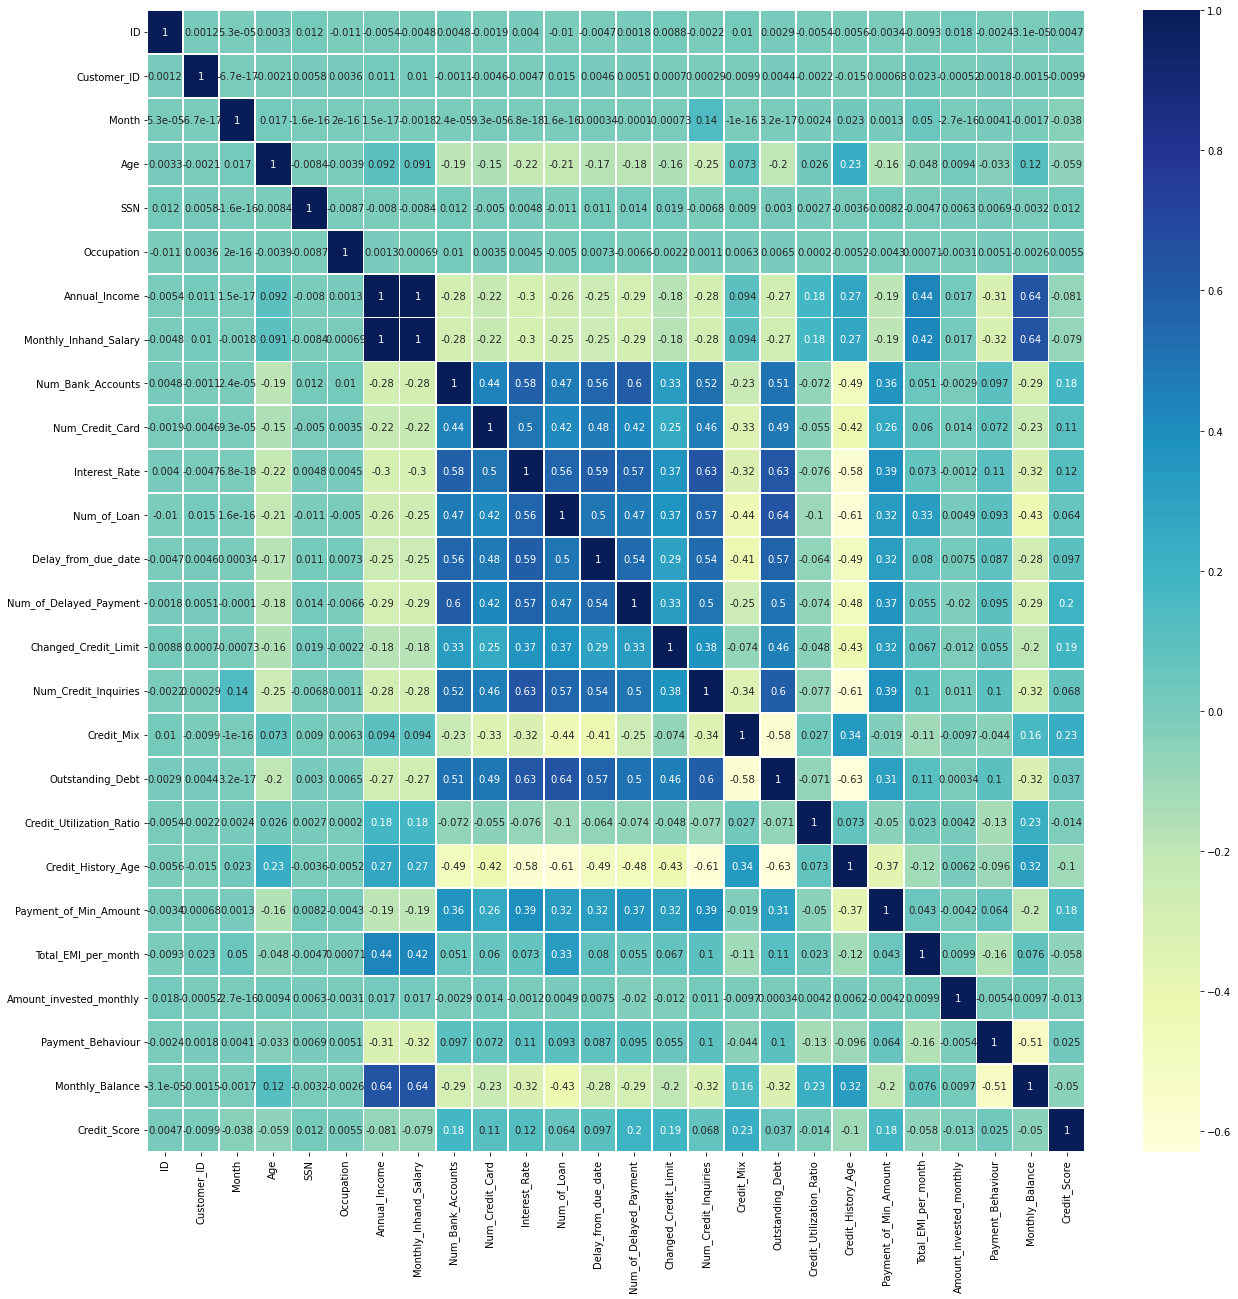

In [ ]:
fig, ax = plt.subplots(figsize=(21,21))                         #correlation map
sns.heatmap(data.corr(), cmap="YlGnBu", linewidths=.8, ax=ax,annot=True)

# Splitting the Data into Training Data and Testing Data

We get rid of the features that are not relevant to our predictions.

In [ ]:
X = data.drop(['Credit_Score', 'ID', 'Name','SSN','Monthly_Inhand_Salary'], axis=1)

In [ ]:
y = data['Credit_Score']

Training Data = 80%
Testing Data = 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 23)

(20000, 23)

(80000,)

(20000,)

In [ ]:
y_train.value_counts(normalize=True) * 100

2    53.25375
1    28.89875
0    17.84750
Name: Credit_Score, dtype: float64

In [ ]:
y_test.value_counts(normalize=True) * 100

2    52.855
1    29.395
0    17.750
Name: Credit_Score, dtype: float64

In [ ]:
X_train = X_train.drop(columns=[ "Type_of_Loan"])    #dropping this column 
X_test = X_test.drop(columns=[ "Type_of_Loan"])

# Building the Models

**Evaluation metrics** for all the classifiers:

*   **Confusion Matrix:** Accounts to the information regarding true positives and negatives & false positives and negatives.
*   **Cohen Kappa score** : Accuracy scores does not take the class imbalance into account.It is a metric to quantify the agreement between two raters.A score of 0.81- 1.00 is perfect while a score of 0.61 to 0.80 is substantial and a score between 0.41 to 0.6 is moderate.
*  **Log loss** : It indicates how close the prediction probability is to the corresponding actual value.It takes model’s uncertainty into account.
*   **Roc Auc score**: It measures a classifier’s ability to differentiate between each class in balanced classification. The final AUROC is averaged using either macro or weighted methods. We averaged with weighted. The metric is only used with classifiers that can generate class membership probabilities
*   **Classification report** : Gives the precision, recall and f1 score.








### Logistic Regression

Logistic Regression : Is a classification technique used in machine learning, which uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature.In the multiclass case uses the one-vs-rest (OvR) scheme for training the model. It by default works poorly in multiclass cases.

In [ ]:
y_labels = le_target.inverse_transform([0,1,2])  #inverse transforming the label encoded values
y_labels

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
LR = LogisticRegression()                      #model
LR = LR.fit(X_train, y_train)                  #fitting the model on train data
y_pred_lr = LR.predict(X_test)                 #predicting the data on test set
y_pred_test_lr = LR.predict(X_train)
acc_lr = score(y_test, y_pred_lr, average = 'micro')*100
print("Score is {:.3f}".format(score(y_test, y_pred_lr, average = 'micro')*100))          #accuracy test
print("Accuracy for the test data is {:.3f}".format (accuracy_score(y_test, y_pred_lr)*100))
print("Accuracy for the train data is {:.3f}".format (accuracy_score(y_train, y_pred_test_lr)*100))  #train accuracy

Score is 53.775
Accuracy for the test data is 53.775
Accuracy for the train data is 53.736


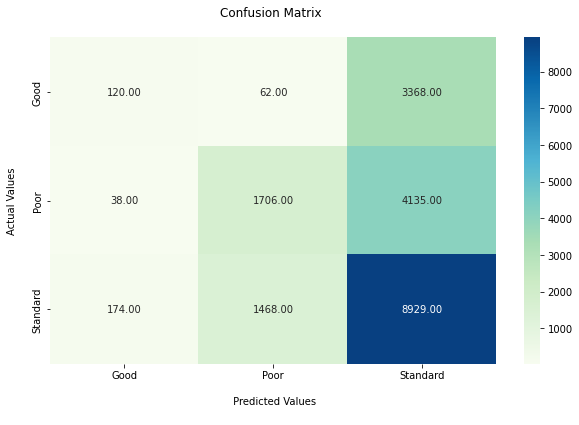

In [ ]:
#confusion matrix
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(y_labels)
fx.yaxis.set_ticklabels(y_labels)
plt.show()

In [ ]:
y_preb_probs_lr = LR.predict_proba(X_test)              #ROC AUC score 
print("ROC AUC score : ",roc_auc_score(y_test, y_preb_probs_lr, average="weighted", multi_class="ovr"))

ROC AUC score :  0.639572532332797


In [ ]:
ll_lr =  (log_loss(y_test, y_preb_probs_lr))
print("Log loss test data is {:.3f}".format (ll_lr))  #Log loss value

Log loss test data is 0.908


In [ ]:
cohen_lr = cohen_kappa_score(y_test, y_pred_lr)   #cohen kappa score
print("Cohen kappa score : ", cohen_lr)

Cohen kappa score :  0.10283780602085968


In [ ]:
print(classification_report(y_test, y_pred_lr,target_names=y_labels))  #classification report

              precision    recall  f1-score   support

        Good       0.36      0.03      0.06      3550
        Poor       0.53      0.29      0.37      5879
    Standard       0.54      0.84      0.66     10571

    accuracy                           0.54     20000
   macro avg       0.48      0.39      0.37     20000
weighted avg       0.51      0.54      0.47     20000



In [ ]:
result_lr = pd.DataFrame({"Y_test" : le_target.inverse_transform(y_test) , "Y_pred": le_target.inverse_transform(y_pred_lr)})  #dataframe for pred and actual test result
result_lr.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,Standard,Standard,Poor,Standard,Poor,Standard,Poor,Standard,Standard,Standard,Poor,Standard,Standard,Standard,Standard,Standard,Poor,Standard,Standard,Standard
Y_pred,Standard,Standard,Standard,Standard,Poor,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Poor,Standard,Standard,Standard,Standard,Standard,Standard,Standard


### Random Forest Classifier

Random Forest Classifier : A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [ ]:
RC =RandomForestClassifier(criterion = 'entropy',n_estimators = 100, max_features = 12)
RC =RC.fit(X_train, y_train)
y_pred_RC = RC.predict(X_test)
y_pred_train_rc = RC.predict(X_train)
acc_rc = score(y_test, y_pred_RC, average = 'micro')*100
print("score is {}".format (acc_rc))
print("Accuracy for test data is {}".format (accuracy_score(y_test, y_pred_RC)*100))
print("Accuracy for train data is {}".format (accuracy_score(y_train, y_pred_train_rc)*100))

score is 83.12
Accuracy for test data is 83.12
Accuracy for train data is 100.0


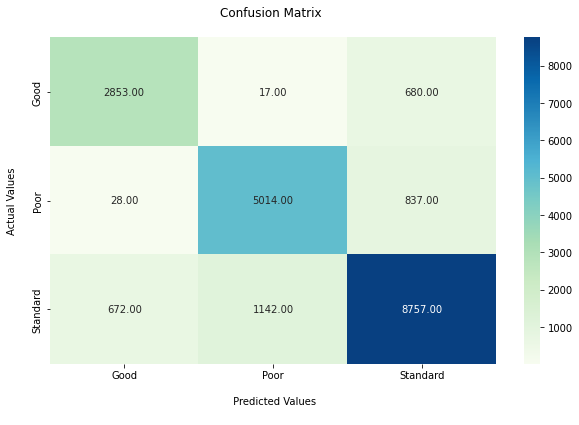

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_RC), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(y_labels)
fx.yaxis.set_ticklabels(y_labels)
plt.show()

In [ ]:
y_preb_probs_rc = RC.predict_proba(X_test)
print("ROC AUC score : ",roc_auc_score(y_test, y_preb_probs_rc, average="weighted", multi_class="ovr"))

ROC AUC score :  0.9243471404537615


In [ ]:
ll_rc = log_loss(y_test, y_preb_probs_rc)
print("Log loss test data is {:.3f}".format (ll_rc))

Log loss test data is 0.437


In [ ]:
cohen_rc = cohen_kappa_score(y_test, y_pred_RC)
print("Cohen kappa score : ", cohen_rc)

Cohen kappa score :  0.7215547575703836


In [ ]:
print(classification_report(y_test, y_pred_RC,target_names=y_labels))

              precision    recall  f1-score   support

        Good       0.80      0.80      0.80      3550
        Poor       0.81      0.85      0.83      5879
    Standard       0.85      0.83      0.84     10571

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000



### K Neighbors Classifier

K Neighbors Classifier : A Classifier implementing the k-nearest neighbors vote. The n_neighbors parameter gives the number of neighbors to use.


In [ ]:
KN = KNeighborsClassifier(n_neighbors=7)
KN = KN.fit(X_train, y_train)
y_pred_kn = KN.predict(X_test)
y_pred_test_kn = KN.predict(X_train)
acc_kn = score(y_test, y_pred_kn, average = 'micro')*100
print("Score is {:.3f}".format(acc_kn))
print("Accuracy for the test data is {:.3f}".format (accuracy_score(y_test, y_pred_kn)*100))
print("Accuracy for the train data is {:.3f}".format (accuracy_score(y_train, y_pred_test_kn)*100))

Score is 78.405
Accuracy for the test data is 78.405
Accuracy for the train data is 84.399


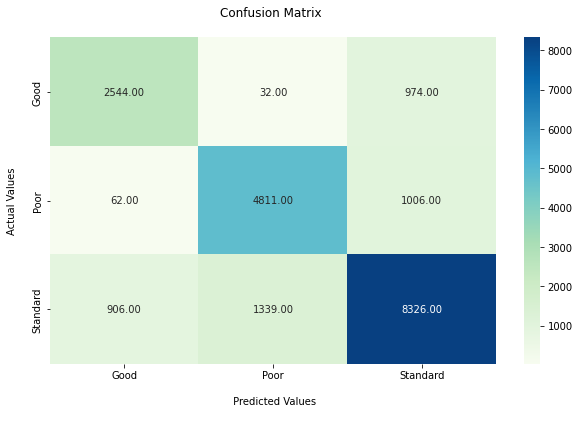

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_kn), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(y_labels)
fx.yaxis.set_ticklabels(y_labels)
plt.show()

In [ ]:
y_preb_probs_kn = KN.predict_proba(X_test)
print("ROC AUC score : ",roc_auc_score(y_test, y_preb_probs_kn, average="weighted", multi_class="ovr"))

ROC AUC score :  0.8935912534560025


In [ ]:
ll_kn = log_loss(y_test, y_preb_probs_kn)
print("Log loss test data is {:.3f}".format (log_loss(y_test, y_preb_probs_kn)))

Log loss test data is 1.154


In [ ]:
cohen_kn = cohen_kappa_score(y_test, y_pred_kn)
print("Cohen kappa score : ", cohen_kn)

Cohen kappa score :  0.6434169333347688


In [ ]:
print(classification_report(y_test, y_pred_kn,target_names=y_labels))

              precision    recall  f1-score   support

        Good       0.72      0.72      0.72      3550
        Poor       0.78      0.82      0.80      5879
    Standard       0.81      0.79      0.80     10571

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



### Decision Tree Classifier

Decision tree classifier: A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions.

In [ ]:
DTC = DecisionTreeClassifier(criterion = 'entropy', max_features = 3, max_depth = 30)
DTC = DTC.fit(X_train, y_train)
y_pred_DTC = DTC.predict(X_test)
y_pred_test_DTC = DTC.predict(X_train)
acc_dtc = score(y_test, y_pred_DTC, average = 'micro')*100
print("score is {:.3f}".format (score(y_test, y_pred_DTC, average = 'micro')*100))
print("Accuracy for the test data is {:.3f} ".format (accuracy_score(y_test, y_pred_DTC)*100))
print("Accuracy for the train data is {:.3f} ".format (accuracy_score(y_train, y_pred_test_DTC)*100))

score is 75.165
Accuracy for the test data is 75.165 
Accuracy for the train data is 99.019 


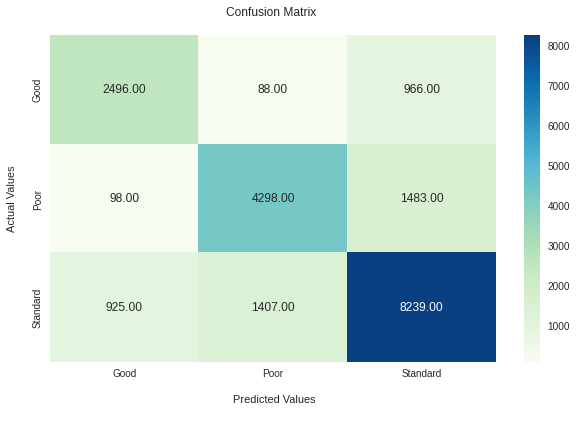

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_DTC), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(y_labels)
fx.yaxis.set_ticklabels(y_labels)
plt.show()

In [ ]:
y_preb_probs_dtc = DTC.predict_proba(X_test)
print("ROC AUC score : ",roc_auc_score(y_test, y_preb_probs_dtc, average="weighted", multi_class="ovr"))

ROC AUC score :  0.7895727260601902


In [ ]:
ll_dtc = log_loss(y_test, y_preb_probs_dtc)
print("Log loss test data is {:.3f}".format (log_loss(y_test, y_preb_probs_dtc)))

Log loss test data is 8.233


In [ ]:
cohen_dtc = cohen_kappa_score(y_test, y_pred_DTC)
print("Cohen kappa score : ", cohen_dtc)

Cohen kappa score :  0.5868883072860671


In [ ]:
print(classification_report(y_test, y_pred_DTC,target_names=y_labels))

              precision    recall  f1-score   support

        Good       0.71      0.70      0.71      3550
        Poor       0.74      0.73      0.74      5879
    Standard       0.77      0.78      0.78     10571

    accuracy                           0.75     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.75      0.75      0.75     20000



# Evaluating the Models

(Graphically presented the above information regarding accuracy, log loss and cohen kappa score between the four trained classifiers)

In [ ]:
log_cols=["Classifier", "Accuracy", "Log Loss","Cohen kappa score"]
log = pd.DataFrame([["Logistic Regression",acc_lr,ll_lr,cohen_lr ],["Random Forest Classifier",acc_rc,ll_rc,cohen_rc],["K Neighnors Classifier",acc_kn,ll_kn,cohen_kn],["Decision Tree Classifier",acc_dtc,ll_dtc,cohen_dtc]], columns=log_cols)


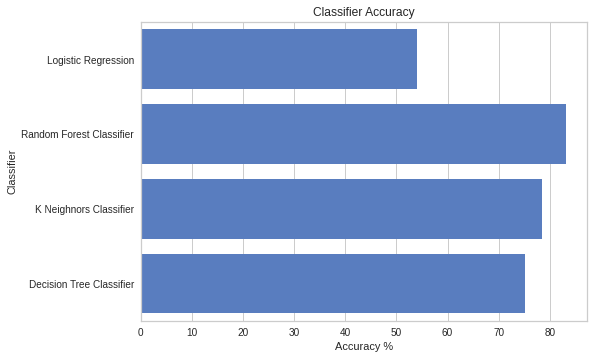

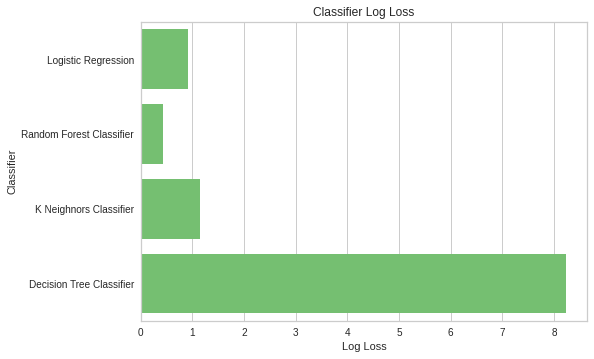

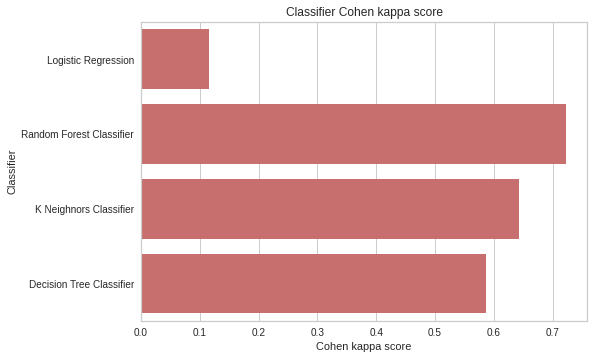

In [ ]:
sns.set_color_codes("muted")                                            #plot regarding accuracy
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")                                              #plot regarding log loss values
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")                                               #plot regarding cohen kappa score
sns.barplot(x='Cohen kappa score', y='Classifier', data=log, color="r")

plt.xlabel('Cohen kappa score')
plt.title('Classifier Cohen kappa score')
plt.show()

#Roc Curve

Generally, ROC curves are plotted for binary classification but using One Vs Rest method, it can be plotted for multi class classification.(The larger the AUROC is, the greater the distinction between the classes)

In [ ]:
from yellowbrick.classifier import ROCAUC

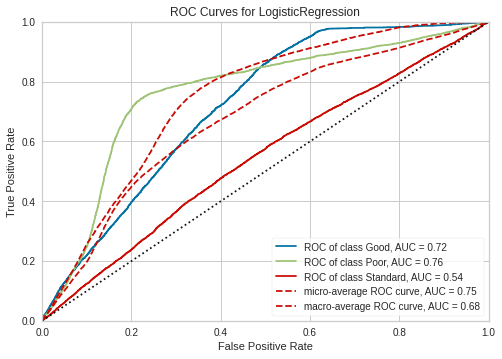

In [ ]:
visualizer = ROCAUC(LR, classes=y_labels)  #Logistic Regression model

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

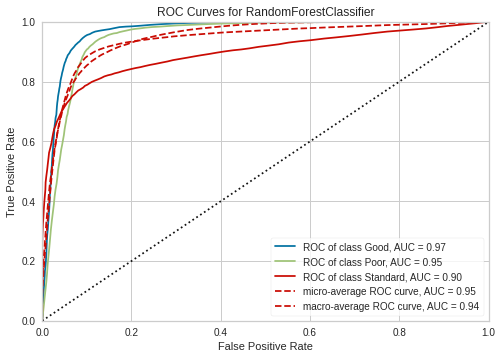

In [ ]:
visualizer = ROCAUC(RC, classes=y_labels)    #Random Forest Classifier model

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
visualizer.show()  

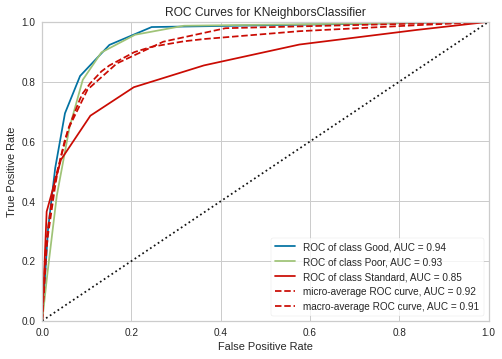

In [ ]:
visualizer = ROCAUC(KN, classes=y_labels)   #K neighbors Classifier

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()  

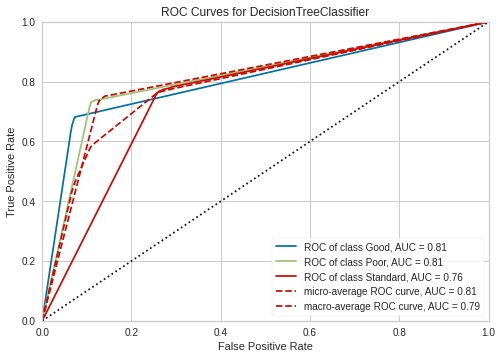

In [ ]:
visualizer = ROCAUC(DTC, classes=y_labels)            #Decision tree classifier

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# Feature Importance for the best Model(Random Forest Classifier)

It is observed that the best classifier among the above models is the Random Forest Classifier. We plotted the top 8 features considered by this model that accounted for its high accuracy among the 4 models.

In [ ]:
def importance_of_features(coef, names, top=-1, model=""):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(10,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for' +" "+ model)
    plt.show()

In [ ]:
features = list(X_train.columns)   #all the features used for training

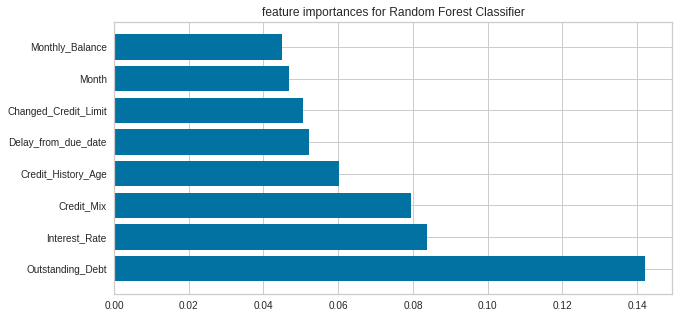

In [ ]:
importance_of_features(abs(RC.feature_importances_), features, top=8,model = "Random Forest Classifier") #top 8 columns used by Random Forest Classifier which lead to its best performance 

# ***Thank You!***